# Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [3]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn
import psycopg2 as psy

#### Step 2: Examine your data 

In [8]:
airport = pd.read_csv('../assets/airports.csv')

In [24]:
airport.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


In [25]:
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 13 columns):
Key                        5164 non-null float64
LocID                      5152 non-null object
AP_NAME                    5164 non-null object
ALIAS                      3498 non-null object
Facility Type              5164 non-null object
FAA REGION                 5164 non-null object
COUNTY                     5164 non-null object
CITY                       5164 non-null object
STATE                      5164 non-null object
AP Type                    5164 non-null object
Latitude                   5164 non-null float64
Longitude                  5164 non-null float64
Boundary Data Available    5164 non-null object
dtypes: float64(3), object(10)
memory usage: 524.8+ KB


In [14]:
cancel = pd.read_csv('../assets/airport_cancellations.csv')

In [22]:
cancel.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [23]:
cancel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 6 columns):
Airport                    805 non-null object
Year                       805 non-null float64
Departure Cancellations    805 non-null float64
Arrival Cancellations      805 non-null float64
Departure Diversions       805 non-null float64
Arrival Diversions         805 non-null float64
dtypes: float64(5), object(1)
memory usage: 37.8+ KB


In [20]:
operation = pd.read_csv('../assets/airport_operations.csv')

In [26]:
operation.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [27]:
operation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 15 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures for metric computation     841 non-null int64
arrivals for metric computation       841 non-null int64
percent on-time gate departures       841 non-null float64
percent on-time airport departures    841 non-null float64
percent on-time gate arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average taxi out delay                841 non-null float64
average airport departure delay       841 non-null float64
average airborne delay                841 non-null float64
average taxi in delay                 841 non-null float64
average block delay                   841 non-null float64
average gate arrival delay            841 non-null float64
dtypes: float64(1

### Intro: Write a problem statement / aim for this project

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [83]:
from psycopg2 import connect
import sys
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

con = connect(user='Lydia', host='localhost')
con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cur = con.cursor()
cur.execute('create Database airport;')
# cur.execute('drop Database airport;')

Load our csv files into tables

In [137]:
from sqlalchemy import create_engine

engine = create_engine('postgresql://Lydia@localhost:5432/airport')

In [ ]:
def load_to_sql(name):
    df = pd.read_csv('../assets/{}.csv'.format(name), encoding='latin1')
    df.to_sql(name, engine, flavor='postgres', if_exists='replace')
    print "done", name

In [138]:
load_to_sql('airports')
load_to_sql('airport_cancellations')
load_to_sql('airport_operations')

done airports
done airport_cancellations
done airport_operations


Join airport_cancellations.csv and airports.csv into one table

In [144]:
%sql postgresql://Lydia@localhost:5432/airport

u'Connected: Lydia@airport'

In [182]:
%%sql
select * from airports limit 5;

5 rows affected.


index,Key,LocID,AP_NAME,ALIAS,Facility Type,faa,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,None,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.01933,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodrï¿½guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


In [158]:
%%sql
select * from airport_cancellations limit 5;

5 rows affected.


index,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [165]:
%%sql
select * from airport_operations limit 5;

5 rows affected.


index,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.814,0.7922,0.8001,9.6,9.79,2.29,11.2,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.4,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [183]:
%%sql
ALTER TABLE airports RENAME COLUMN "LocID" to loc_id;
ALTER TABLE airport_cancellations RENAME COLUMN "Airport" to airport;

Done.


[]

In [187]:
%%sql
SELECT * from airports
FULL JOIN airport_cancellations
ON airports.loc_id = airport_cancellations.airport LIMIT 10;

10 rows affected.


index,Key,loc_id,AP_NAME,ALIAS,Facility Type,faa,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,index_1,airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes,None,None,None,None,None,None,None
1,5088.0,X64,PATILLAS,None,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.01933,No,None,None,None,None,None,None,None
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes,None,None,None,None,None,None,None
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodrï¿½guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes,None,None,None,None,None,None,None
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes,None,None,None,None,None,None,None
5,2884.0,RVR,JOSE APONTE DE LA TORRE,Aeropuerto Josï¿½ Aponte De La Torre,Airport,ASO,#NAME?,CEIBA,PR,Public Use,18.245269,-65.643381,Yes,None,None,None,None,None,None,None
6,2881.0,MAZ,EUGENIO MARIA DE HOSTOS,Aeropuerto Eugenio Marï¿½a De Hostos,Airport,ASO,#NAME?,MAYAGUEZ,PR,Public Use,18.255694,-67.148472,Yes,None,None,None,None,None,None,None
7,5087.0,X95,DIEGO JIMENEZ TORRES,None,Airport,ASO,#NAME?,FAJARDO,PR,Public Use,18.30801,-65.661828,No,None,None,None,None,None,None,None
8,5086.0,CPX,BENJAMIN RIVERA NORIEGA,None,Airport,ASO,#NAME?,ISLA DE CULEBRA,PR,Public Use,18.313289,-65.304324,No,None,None,None,None,None,None,None
9,3442.0,STT,CYRIL E KING,Cyril E King International Airport,Airport,ASO,-VIRGIN ISLANDS-,CHARLOTTE AMALIE,VI,Public Use,18.337306,-64.973361,Yes,None,None,None,None,None,None,None


Query the database for our intial data

In [189]:
cancellations = pd.read_sql_query("SELECT * from airports FULL JOIN airport_cancellations ON airports.loc_id = airport_cancellations.airport", engine)

#### 1.2 What are the risks and assumptions of our data? 

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [198]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

cancellations.head().T

,0,1,2,3,4
index,1223,1223,1223,1223,1223
Key,2348,2348,2348,2348,2348
loc_id,ABQ,ABQ,ABQ,ABQ,ABQ
AP_NAME,ALBUQUERQUE INTL SUNPORT,ALBUQUERQUE INTL SUNPORT,ALBUQUERQUE INTL SUNPORT,ALBUQUERQUE INTL SUNPORT,ALBUQUERQUE INTL SUNPORT
ALIAS,Albuquerque Int'l Sunport,Albuquerque Int'l Sunport,Albuquerque Int'l Sunport,Albuquerque Int'l Sunport,Albuquerque Int'l Sunport
Facility Type,Airport,Airport,Airport,Airport,Airport
faa,ASW,ASW,ASW,ASW,ASW
COUNTY,BERNALILLO,BERNALILLO,BERNALILLO,BERNALILLO,BERNALILLO
CITY,ALBUQUERQUE,ALBUQUERQUE,ALBUQUERQUE,ALBUQUERQUE,ALBUQUERQUE
STATE,NM,NM,NM,NM,NM


In [194]:
cancellations.describe()

,index,Key,Latitude,Longitude,index,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
count,5898.000000,5895.000000,5895.000000,5895.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2487.853001,2652.801187,40.145509,-98.353136,402.000000,2008.986335,1292.038509,1333.124224,173.315528,169.413665
std,1489.773874,1485.360452,7.958860,20.954400,232.527776,3.158116,1835.961943,1975.224868,172.345539,228.521615
min,0.000000,203.000000,17.701556,-177.381308,0.000000,2004.000000,0.000000,0.000000,0.000000,0.000000
25%,1188.250000,1345.500000,34.887222,-109.982025,201.000000,2006.000000,349.000000,314.000000,62.000000,41.000000
50%,2482.500000,2579.000000,39.844210,-93.676632,402.000000,2009.000000,663.000000,642.000000,110.000000,84.000000
75%,3731.750000,3892.500000,43.532770,-83.672680,603.000000,2012.000000,1472.000000,1523.000000,236.000000,190.000000
max,5166.000000,5375.000000,71.284889,-64.801722,804.000000,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000


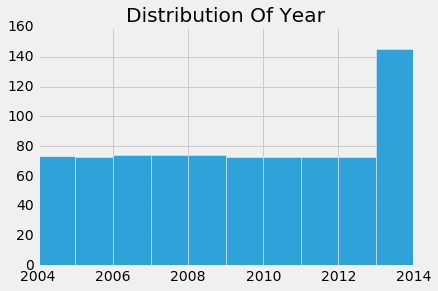

In [201]:
cancellations.Year.hist()
plt.title('Distribution Of Year')

In [211]:
cancellations.groupby().COUNTY.hist()
plt.title('Distribution Of Year')

TypeError: You have to supply one of 'by' and 'level'

#### Are there any unique values? 

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

#### 3.2 Format and Clean the Data

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

#### 4.2 Find correlations in the data

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: 

#### 4.4 Validate your findings using statistical analysis

#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA

#### 5.1 Conduct the PCA

### Part 6: Additional Analysis
Include any other models you'd like to run here. These can include regressions, classifications, or clusters. 

### Part 7: Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps. Put it on your blog, and include the link here.

Which operational features are most correlated with delays?

What should the airport's next steps be?

### Bonus: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied